# 데이터 분석 환경 설정

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 나눔폰트 설치
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# ctrl + / : 주석처리
# 시각화를 위한 폰트 설정
import matplotlib.pyplot as plt
# Window 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')
# Mac 한글 폰트 설정
# plt.rc('font', family = 'AppleGothic')
# minus 폰트 깨짐 방지
plt.rc('axes', unicode_minus = False)
# 유니코드 깨짐 현상 해결
# mpl.rcParams['axes.unicode_minus'] = False
#  그래프가 노트북 안에 보이게 하기
%matplotlib inline

In [4]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 데이터 로드하기
* 판다스에서 데이터 로드 시 read_csv 사용
* 데이터를 로드해서 df라는 변수에 담기
* 그리고 shape를 통해 데이터의 갯수 찍기. 결과는 (행, 열) 순으로 출력.

In [5]:
# 주피터에서는 read_csv로 불러온다.
# 코랩에서 구글드라이브 마운트하여 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 내 드라이브 내의 파일을 불러올 때 경로 /content/drive/My Drive/를 앞에 붙여주기
# encoding='utf-8'이 안될 때는 encoding='CP949' 사용.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/상가업소정보_의료기관_201909.csv', low_memory=False)
df.shape

(91335, 39)

# 데이터 미리보기
* head, tail을 통해 데이터를 미리 볼 수 있다.

In [7]:
# shift + tab : docstring을 볼 수 있다.
# head로 데이터 미리보기
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드  ...  층정보  호정보          경도         위도
0  19956873  하나산부인과  NaN         S  ...  NaN  NaN  126.814295  37.336344

[1 rows x 39 columns]

In [8]:
# tail로 데이터 미리보기
df.tail(1)

상가업소번호           상호명  지점명 상권업종대분류코드  ...  층정보  호정보          경도        위도
91334  16109073  천안김안과천안역본점의원  NaN         S  ...  NaN  NaN  127.152651  36.80664

[1 rows x 39 columns]

In [9]:
# sample로 미리보기
df.sample(1)

상가업소번호     상호명  지점명 상권업종대분류코드  ... 층정보  호정보          경도         위도
84188  15505196  경희맥한의원  NaN         S  ...   2  NaN  126.861979  37.503129

[1 rows x 39 columns]

# 데이터 요약

In [10]:
# info로 데이터 요약.
# 데이터 숫자가 차이가 있는 것은 결측치가 있다는 의미.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [11]:
# 컬럼명 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [12]:
# 데이터 타입 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# 결측치

In [13]:
# 결측치 유무 확인
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

# 한글 깨짐 현상 해결하기
!sudo apt-get install -y fonts-nanum 

!sudo fc-cache -fv 

!rm ~/.cache/matplotlib -rf

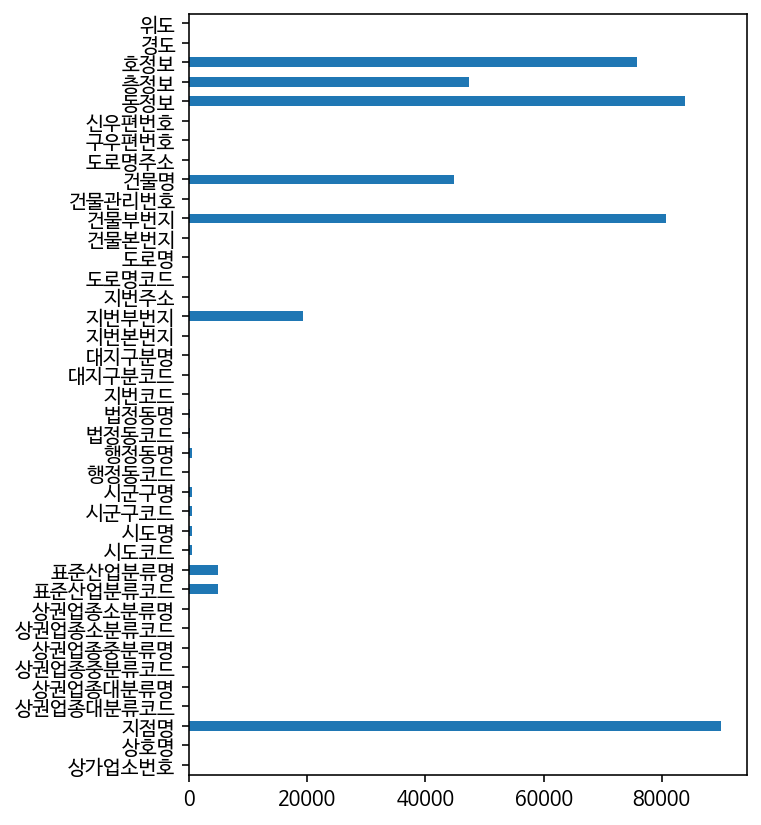

In [14]:
# 위에서 구한 결측치 plot.bar를 통해 막대그래프로 표현.
# null_count.plot.bar(rot = 60)
null_count.plot.barh(figsize = (5,7)) # 막대그래프 가로로 출력

In [15]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 출력
# df_null_count 변수에 결과를 담아 head로 미리보기
df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경

In [16]:
# df_null_count 변수에 담겨있는 컬럼명을 "컬럼명", "결측치수"로 변경
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [17]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬
# 결측치가 많은 순으로 상위 10개 출력
df_null_count_top = df_null_count.sort_values(by = "결측치수", ascending=False).head(10)
df_null_count_top

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75784
35       층정보  47291
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

# 특정 컬럼만 불러오기

In [18]:
# 지점명 컬럼 출력
# NAN == Not a Number의 약자로 결측치 의미
df["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [19]:
# "컬럼명"이라는 컬럼의 값만 가져와서 drop_columns라는 변수에 담기.
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [20]:
# drop_columns 변수로 해당 컬럼 정보만 데이터 프레임에서 가져오기
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

# 제거하기

In [21]:
# axis = 0은 행 1은 열
print(df.shape)
df = df.drop(drop_columns, axis = 1)
print(df.shape)

(91335, 39)
(91335, 29)


In [22]:
# 제거 결과 info로 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

# 기초 통계값 보기

### 기초통계 수치

In [25]:
# 평균값 : 최솟값과 최댓값에 영향을 받는다.
# df.dtypes 데이터 타입 확인
df["위도"].mean()

36.62471119236673

In [26]:
# 중앙값 : 최솟값과 최댓값에 영향 안받음.
df["위도"].median()

37.23465231770329

In [27]:
# 최댓값
df["위도"].max()

38.499658570559795

In [28]:
# 최솟값
df["위도"].min()

33.2192896688307

In [29]:
# 갯수
df["위도"].count()

91335

### 기초통계값 요약 - describe
* describe을 사용하면 데이터 요약 출력. 기본적으로 수치형 데이터를 요약해서 보여줌. 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위(25%), 2사분위(50%), 3사분위(75%), 최댓값 확인 가능.

In [30]:
# 위도를 describe으로 요약
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [33]:
# 2개의 컬럼을 describe으로 요약
# 두 개 이상은 list형식으로 출력해야 함.
df[["위도","경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [37]:
# describe으로 문자열 데이터 요약
# top은 가장 많이 등장하는 문자열 데이터
# freq은 빈도수를 의미
# 결측치는 제외해서 보여줌
df.describe(include="object")

# df.describe(include="all")은 모든 데이터 요약.

상호명 상권업종대분류코드  ...                     건물관리번호                  도로명주소
count   91335     91335  ...                      91335                  91335
unique  56910         1  ...                      54142                  54031
top        리원         S  ...  1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10
freq      152     91335  ...                        198                    198

[4 rows x 16 columns]

### 중복제거한 값 확인
* unique로 중복을 제거한 값을 보고, nunique로 갯수 확인.

In [38]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [39]:
df["상권업종대분류명"].nunique()

1

In [40]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [42]:
df["상권업종중분류명"].nunique()

5

In [43]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [44]:
df["상권업종소분류명"].nunique()

34

In [46]:
# nunique 대신 len으로도 사용가능
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 확인 - value_counts
* value_counts를 사용 시 카테고리 형태의 데이터 갯수를 세어볼 수 있다.

In [47]:
# value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있다.
# 시도코드 세어보기.
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [52]:
# 시도명 세어보기 (빈도수 출력)
city = df['시도명'].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [53]:
# normalize=True 옵션 사용 시 비율을 구할 수 있다.
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

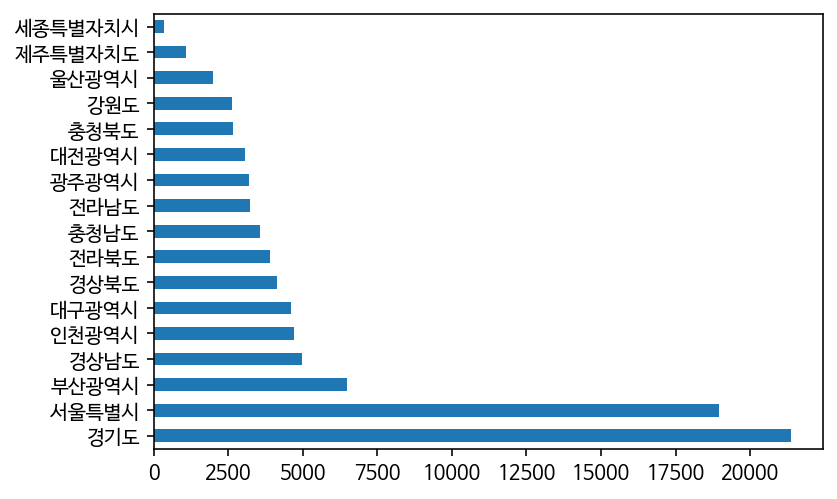

In [55]:
# Pandas 에는 plot기능을 내장하고 있다.
# 위에서 분석한 시도명 수를 막대그래프로 표현
city.plot.barh()

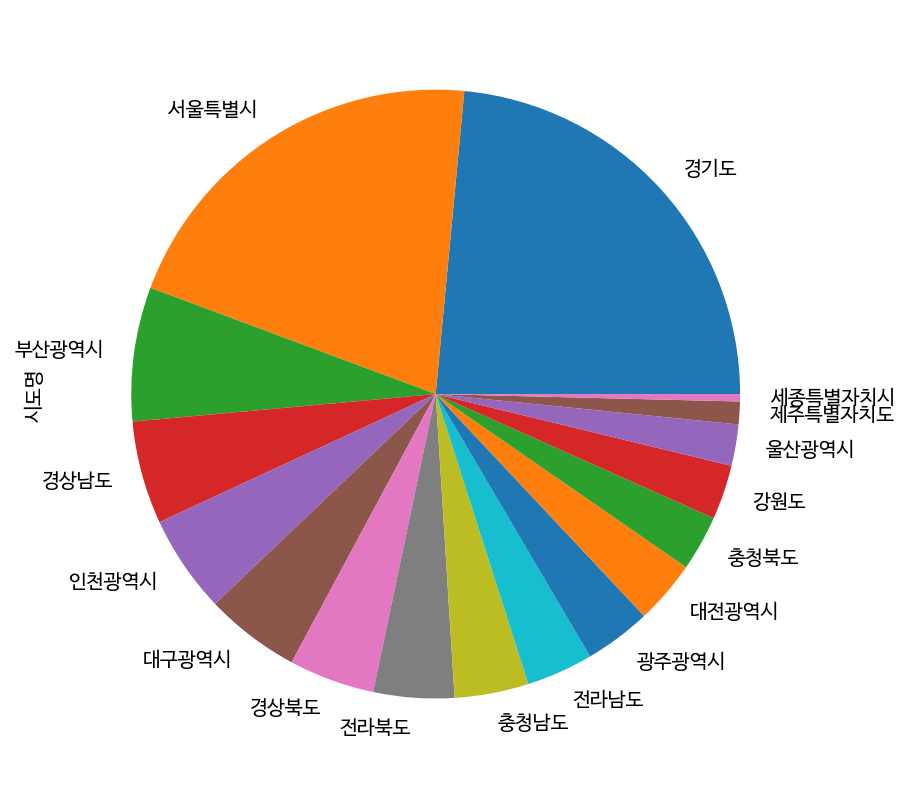

In [58]:
# 판다스의 plot.pie()를 사용해 파이그래프 그려보기
# 정확한 비율 확인이 어려워서 시각화에 적합하지 않음
city_normalize.plot.pie(figsize = (7,7))

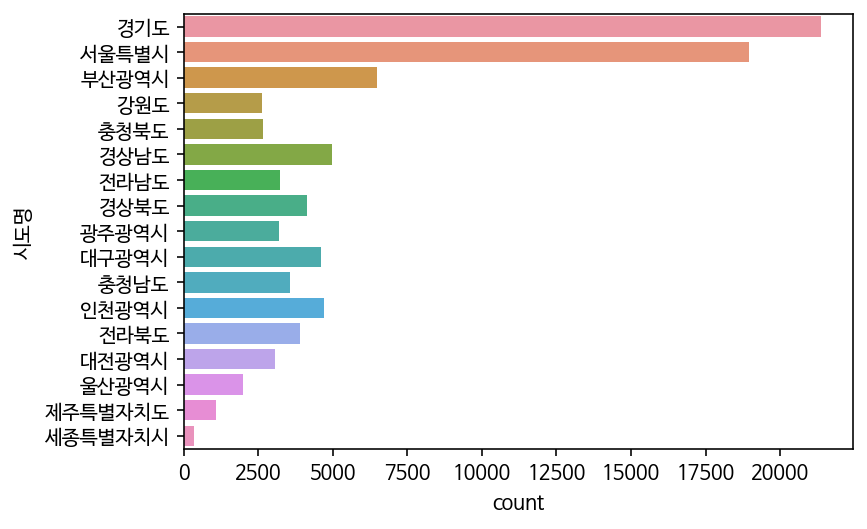

In [61]:
# seaborn의 countplot으로 그려보기
# seaborn은 고급 통계기능이 자동으로 적용됨, but 데이터가 크면 시간이 오래걸린다.
c = sns.countplot(data = df, y = "시도명")

In [62]:
# "상권업종대분류명"으로 갯수 세어보기
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [65]:
# "상권업종중분류명"으로 갯수 세어보기
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [66]:
# normalize=True를 사용해 비율 구하기
n = df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

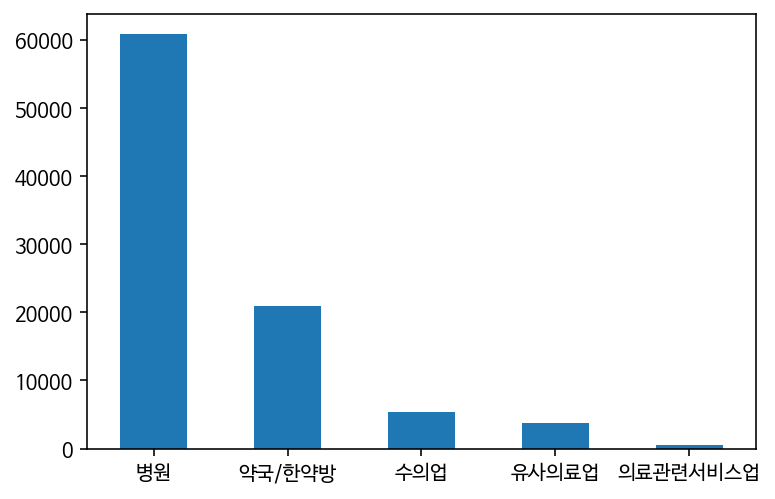

In [68]:
# 판다스의 plot.bar()을 사용해 막대그래프 그리기
# rot = 레이블 값을 얼마나 회전시킬 것인지
c.plot.bar(rot = 0)

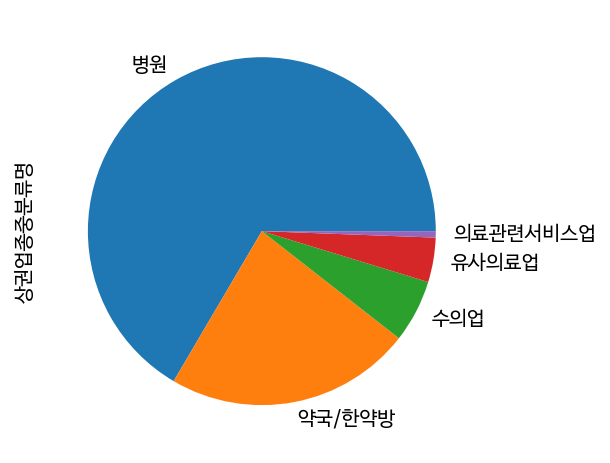

In [69]:
# 판다스의 plot.pie()를 사용해 파이그래프 그려보기
n.plot.pie()

In [71]:
# "상권업종소분류명"에 대한 그룹화된 값을 카운트
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

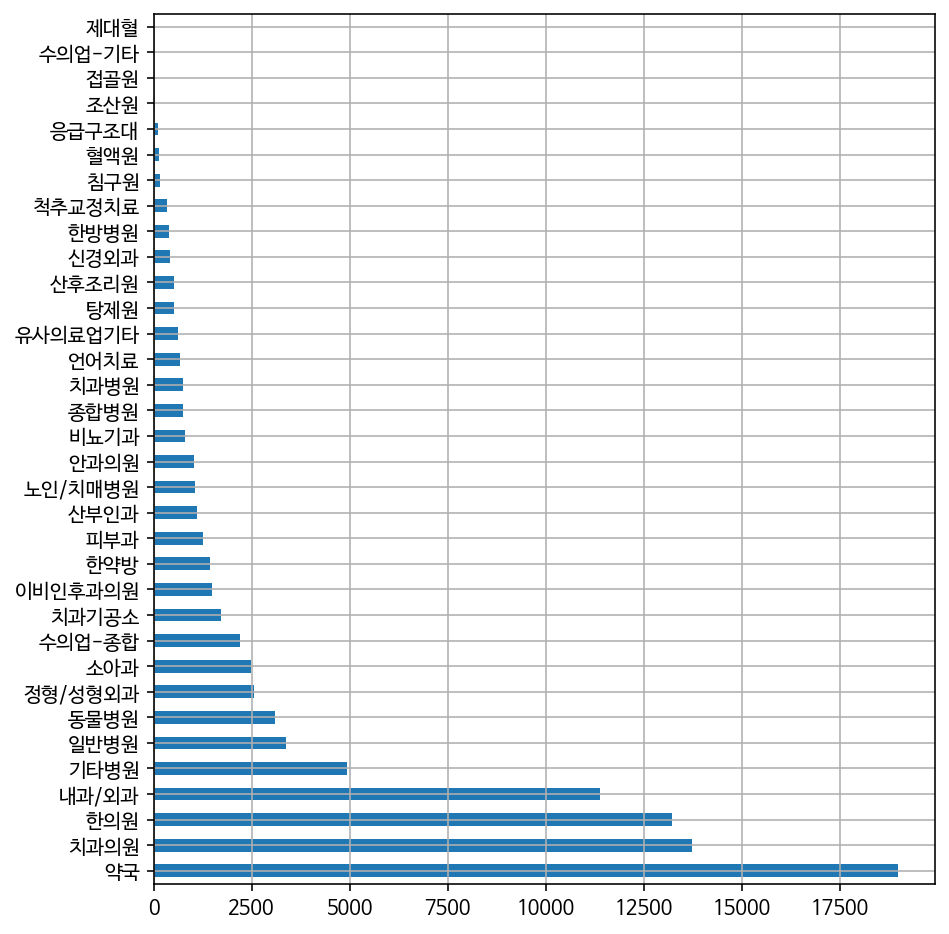

In [74]:
# 판다스의 plot.bar()을 사용해 막대그래프 그려보기
c.plot.barh(figsize = (7,8), grid=True)

# 데이터 색인하기
* 특정 데이터만 모아서 따로 출력

In [77]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와 df_medical이란 변수에 담기
# head()를 통해 미리보기
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드  ...    신우편번호          경도         위도
4  20364049  더블유스토어수지점         S  ...  16837.0  127.095522  37.323528

[1 rows x 29 columns]

In [82]:
# "상권업종대분류명"에서 "의료"만 가져오기
# df.loc를 사용하면 행, 열을 함께 가져올 수 있다.
# 이 기능을 통해  "상권업종중분류명"만 가져오기
# 그리고 가져온 결과를 value_counts를 통해 중분류의 갯수 확인
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
# 위와 똑같은 기능 수행 코드. 아래와 같이 한줄에 표현 가능
# df.loc[df["상권업종대분류명"]] == "의료", "상권업종중분류명"].value_counts()

In [91]:
# 유사의료업만 따로 모아보기
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [88]:
# 상호명을 그룹화해서 갯수 확인
# value_counts를 사용해 상위 10개 출력
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [94]:
# 유사의료업만 df_medi 변수에 감기
# df_medi 변수에서 상호명을 갯수로 세어보기
# 가장 많은 상호 상위 10개 출력
df_medi["상호명"].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
고려수지침학회      10
수치과기공소       10
제일치과기공소       9
대한응급환자이송단     8
이사랑치과기공소      8
어울림치과기공소      8
Name: 상호명, dtype: int64

### 여러 조건으로 색인

In [102]:
# "상권업종소분류명"이 "약국"인것 과 "시도명"이 "서울특별시"인 데이터만 출력
# and == & , or == |
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


상가업소번호    상호명 상권업종대분류코드 상권업종대분류명  ...     구우편번호   신우편번호          경도         위도
33  20816709  이즈타워약         S       의료  ...  135080.0  6134.0  127.028023  37.498656

[1 rows x 29 columns]

### 구별로 보기

In [107]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화해서 갯수 확인
# 구별로 약국이 몇개인지 확인
c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [106]:
# normalize=True를 통해 비율 확인
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

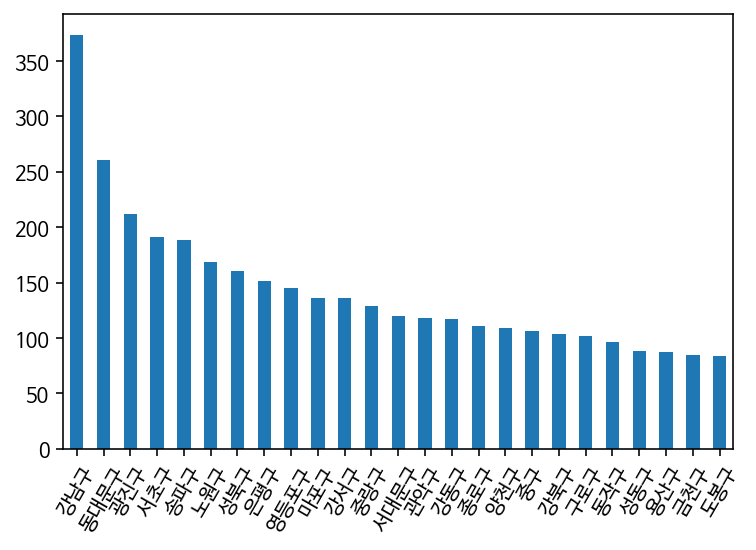

In [109]:
# 위에서 구한 결과를 판다스 plot.bar()를 활용해 막대그래프로 출력
c.plot.bar(rot = 60)

In [153]:
# "상권업종소분류명"이 "종합병원"인 것과 "시도명"이 "서울특별시"인 데이터 출력
# 결과를 df_seoul_hospital에 할당해 재사용
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원")&(df["시도명"] == "서울특별시")].copy()
df_seoul_hospital

상가업소번호               상호명 상권업종대분류코드  ...   신우편번호          경도         위도
305    25155642            대진의료재단         S  ...  4944.0  127.088279  37.559048
353    20471487            홍익병원별관         S  ...  7937.0  126.862805  37.529213
385    20737057              SNUH         S  ...  6236.0  127.035825  37.499630
1917   23210677  평화드림여의도성모병원의료기매장         S  ...  7345.0  126.936693  37.518296
2461   20024045                한양         S  ...  4763.0  127.041325  37.559469
...         ...               ...       ...  ...     ...         ...        ...
71991  28505952      서울성모병원응급의료센터         S  ...  6591.0  127.005841  37.502382
76508  12292992             라마르의원         S  ...  5335.0  127.127466  37.538485
90492  16031909     가톨릭대학교여의도성모병원         S  ...  4537.0  126.986758  37.563662
90581  16332576              씨엠병원         S  ...  7301.0  126.903857  37.518807
90788  16162338            성베드로병원         S  ...  6271.0  127.039567  37.485604

[91 rows x 29 columns]

In [154]:
# "시군구명"으로 그룹화 해서 구별로 종합병원 수 확인
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
중구       5
송파구      5
강동구      5
도봉구      4
강북구      4
서대문구     4
양천구      4
성북구      3
성동구      2
금천구      2
강서구      2
노원구      2
중랑구      2
종로구      2
구로구      2
동대문구     2
관악구      2
용산구      1
동작구      1
마포구      1
은평구      1
Name: 시군구명, dtype: int64

### 텍스트 데이터 색인

In [155]:
# 색인하기 전에 상호명 중 종합병원이 아닌 데이터 확인
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),
                      "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [156]:
# 상호명에 특정 단어가 들어가는 데이터만 출력 - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명 상권업종대분류코드  ...   신우편번호          경도         위도
2803  20895655  서울성모병원장례식장꽃배달         S  ...  6578.0  127.000682  37.498257
4644  22020310  강남성모병원장례식장꽃배달         S  ...  6578.0  127.001756  37.499095

[2 rows x 29 columns]

In [157]:
# 특정 단어가 들어가는 데이터만 출력 - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

상가업소번호               상호명 상권업종대분류코드  ...   신우편번호          경도         위도
1917  23210677  평화드림여의도성모병원의료기매장         S  ...  7345.0  126.936693  37.518296

[1 rows x 29 columns]

In [158]:
# "꽃배달|의료기|장례식장|상담소|어린이집"은 종합병원과 무관.
# 전처리를 위해 해당 텍스트 한 번에 검색
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list형태로 변환
drop_row = df_seoul_hospital[
                             df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집|학원|연구소")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 9529, 10283, 25858, 47008, 60645, 70177]

In [159]:
# 의원으로 끝나는 데이터도 종합병원으로 볼수 없기 때문에 인덱스를 찾아
# drop_row2에 담아준 후 list형태로 변환
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [160]:
# 재단으로 끝나는 데이터도 종합병원으로 볼수 없기 때문에 인덱스를 찾아
# drop_row3에 담아준 후 list형태로 변환
drop_row3 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("재단")].index
drop_row3 = drop_row3.tolist()
drop_row3

[305, 5089, 5824, 5867, 30648, 40342, 44681]

In [161]:
# 삭제할 행을 drop_row에 합쳐주기
drop_row = drop_row + drop_row2 + drop_row3
len(drop_row)

42

In [162]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수 비교
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
# axis= 0 은 행기준, 1 은 컬럼 기준
print(df_seoul_hospital.shape)

(91, 29)
(49, 29)


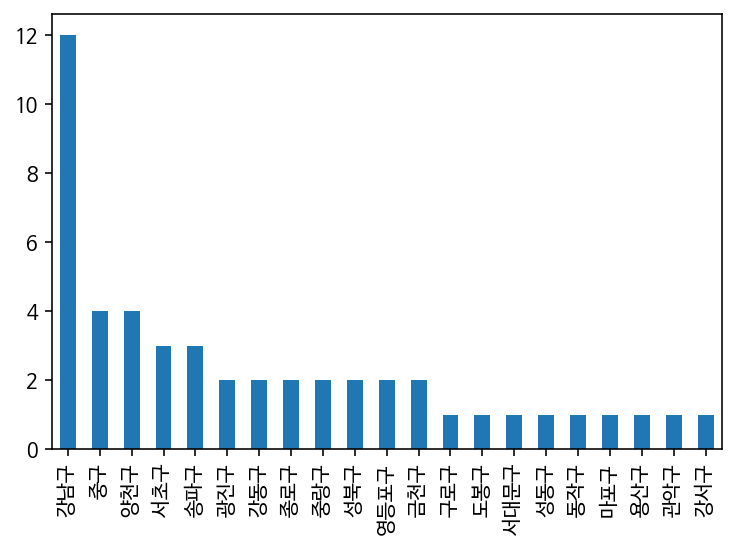

In [163]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그리기.
df_seoul_hospital["시군구명"].value_counts().plot.bar()

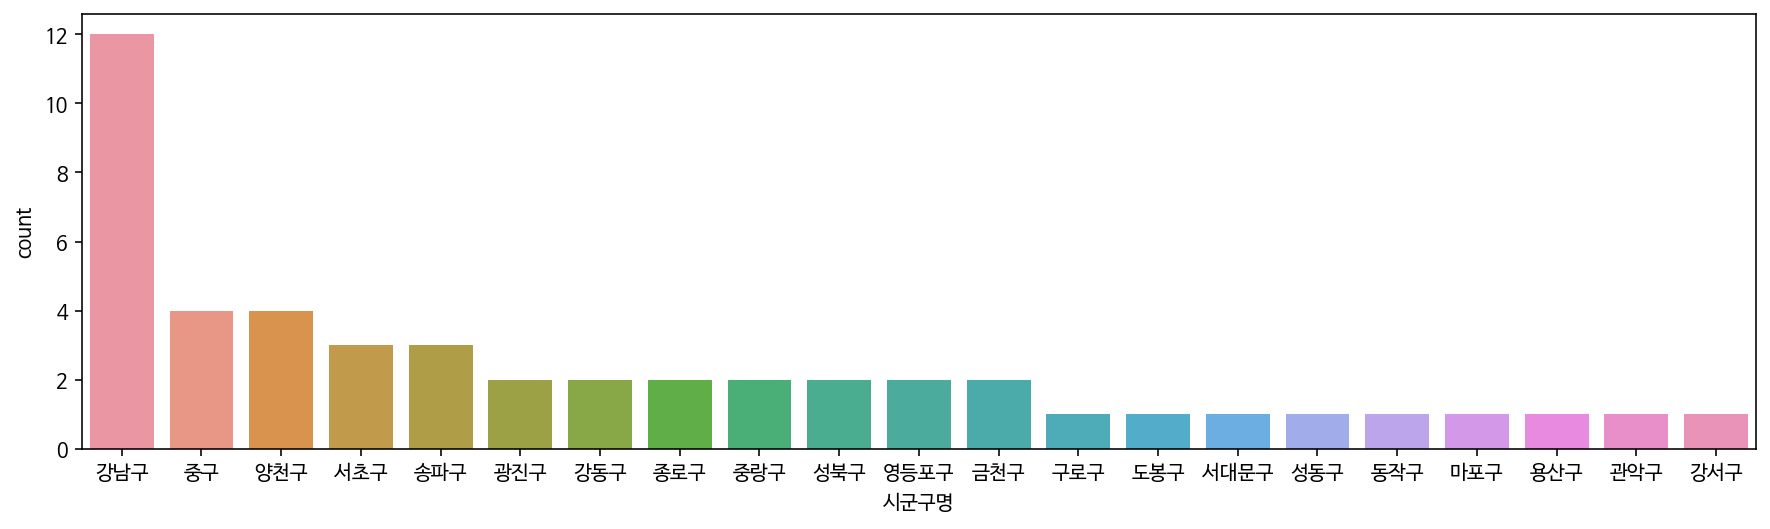

In [164]:
plt.figure(figsize = (15,4)),
sns.countplot(data = df_seoul_hospital, x = "시군구명",
              order = df_seoul_hospital["시군구명"].value_counts().index)

In [165]:
df_seoul_hospital["상호명"].unique()

array(['홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원', '서울대학교병원', '제일병원',
       '이랜드클리닉', '우울증센터', '서울아산병원신관', '고려대학교구로병원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', 'Y&T성모마취과', '인제대학교서울백병원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원',
       '건국대학교병원', '서울적십자병원', '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'],
      dtype=object)

### 특정 지역만 보기

In [166]:
# 서울에 있는 데이터의 위도와 경도 확인
# 결과를 df_seoul 이란 데이터프레임에 저장
# 새로운 변수에 데이터프레임 저장 시 copy()를 사용
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

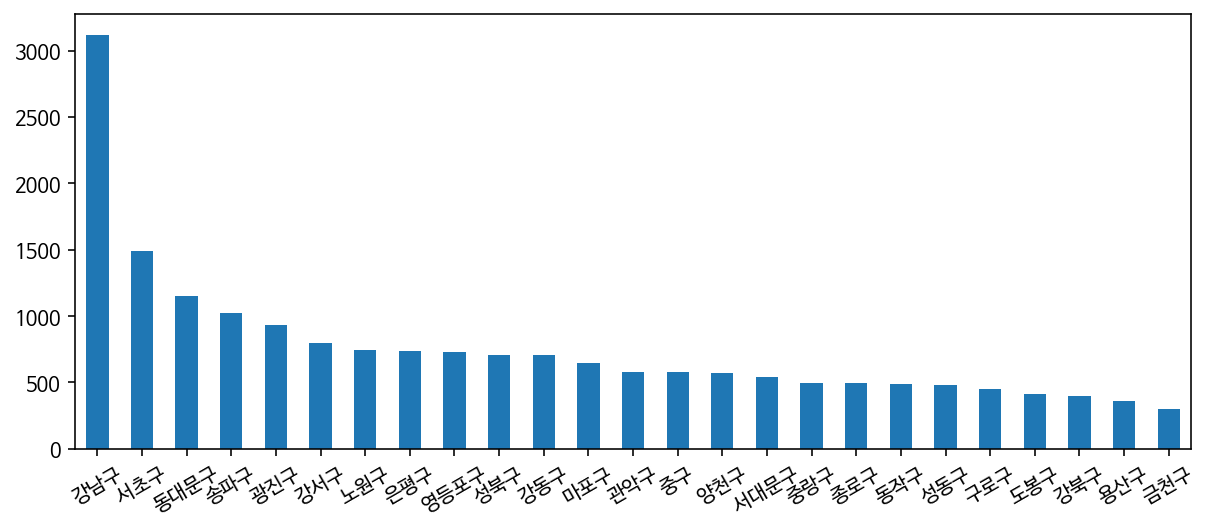

In [171]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의 시군구명을 시각화
df_seoul["시군구명"].value_counts().plot.bar(figsize = (10,4), rot = 30)

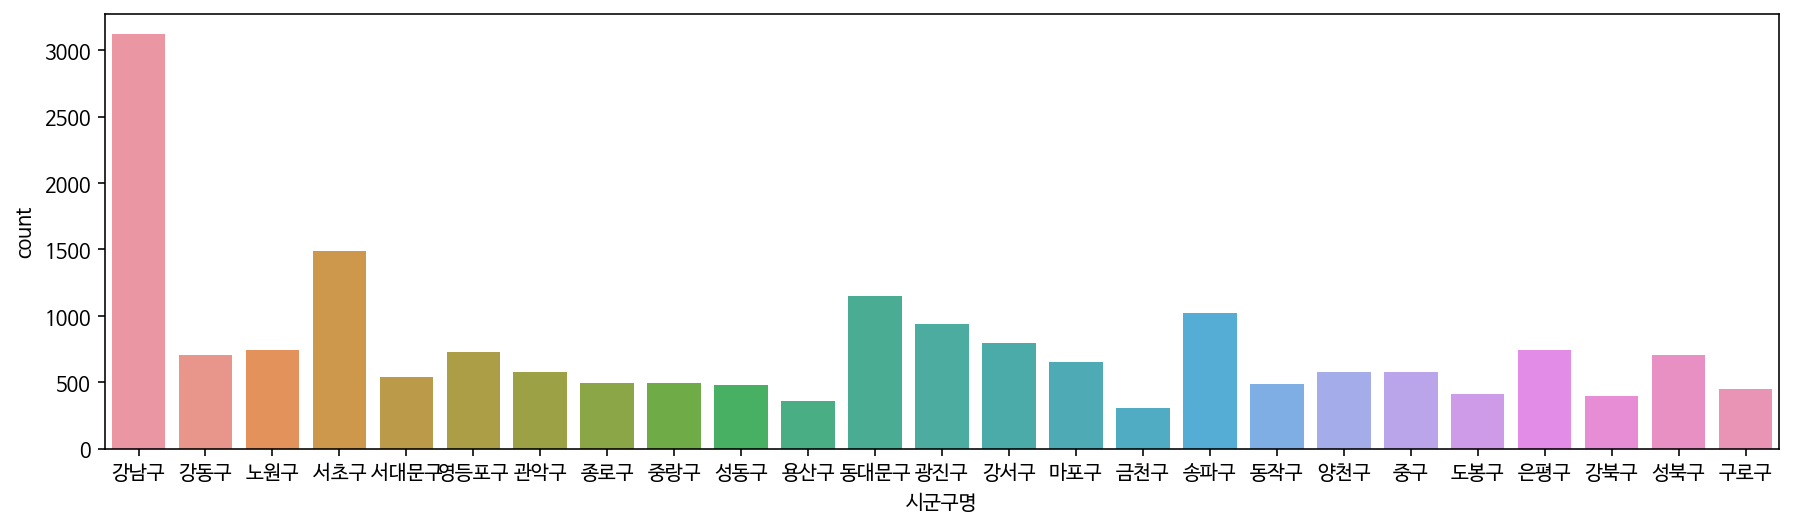

In [173]:
# 시군구명을 seaborn의 countplot으로 시각화
plt.figure(figsize = (15,4))
sns.countplot(data = df_seoul, x = "시군구명")

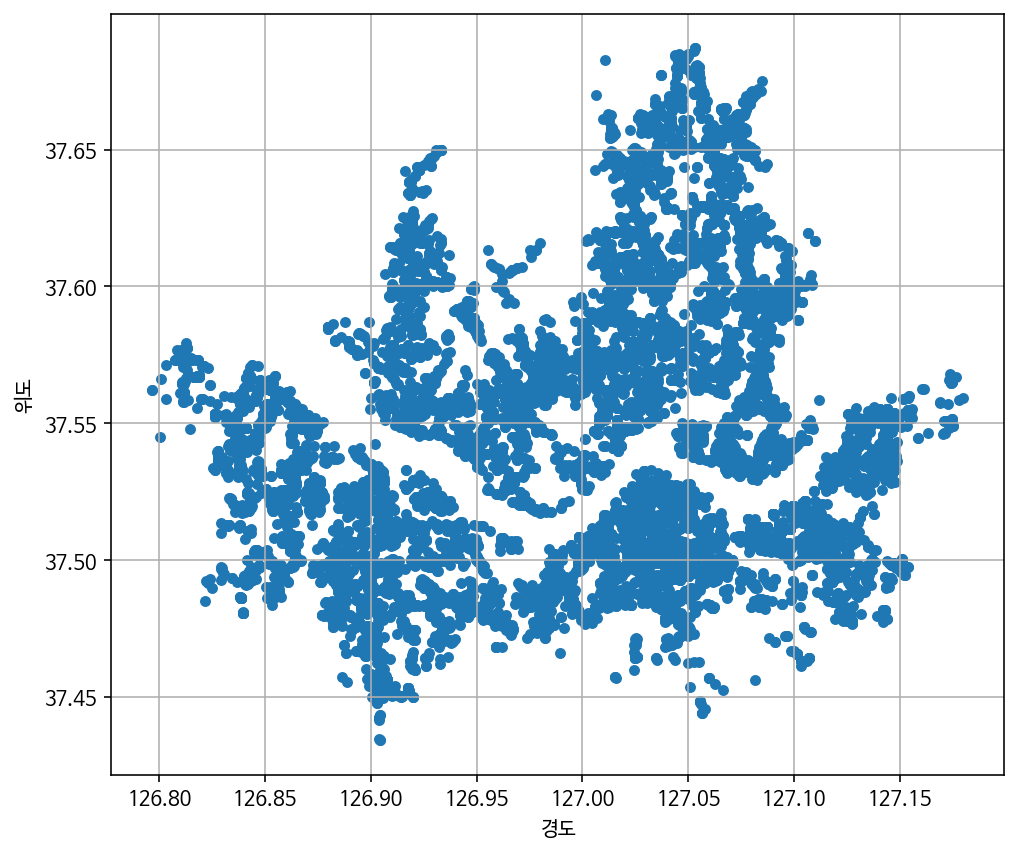

In [175]:
# Pandas와 plot.scatter을 통해 경도와 위도 표시
# plot.scatter은 x축과 y축이 필수!
# 수치형 데이터 시각화에 많이 사용
df_seoul[["경도","위도","시군구명"]].plot.scatter(x = "경도", y = "위도", figsize = (8,7), grid = True)

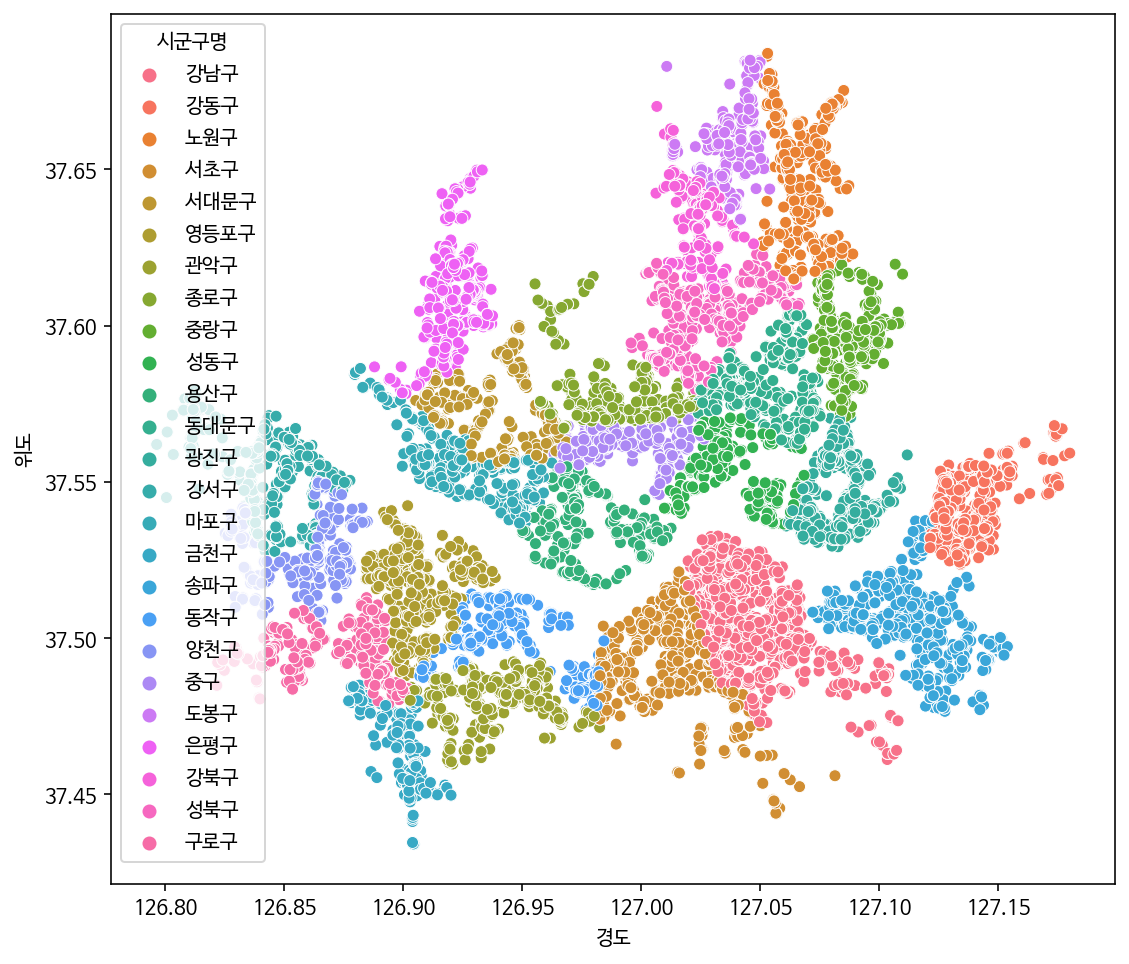

In [176]:
# seaborn의 scatterplot을 통해 구별 경도와 위도 표시
# hue 값에 따라 색상이 다르게 표현
plt.figure(figsize = (9,8))
sns.scatterplot(data = df_seoul, x = "경도", y = "위도", hue = "시군구명")

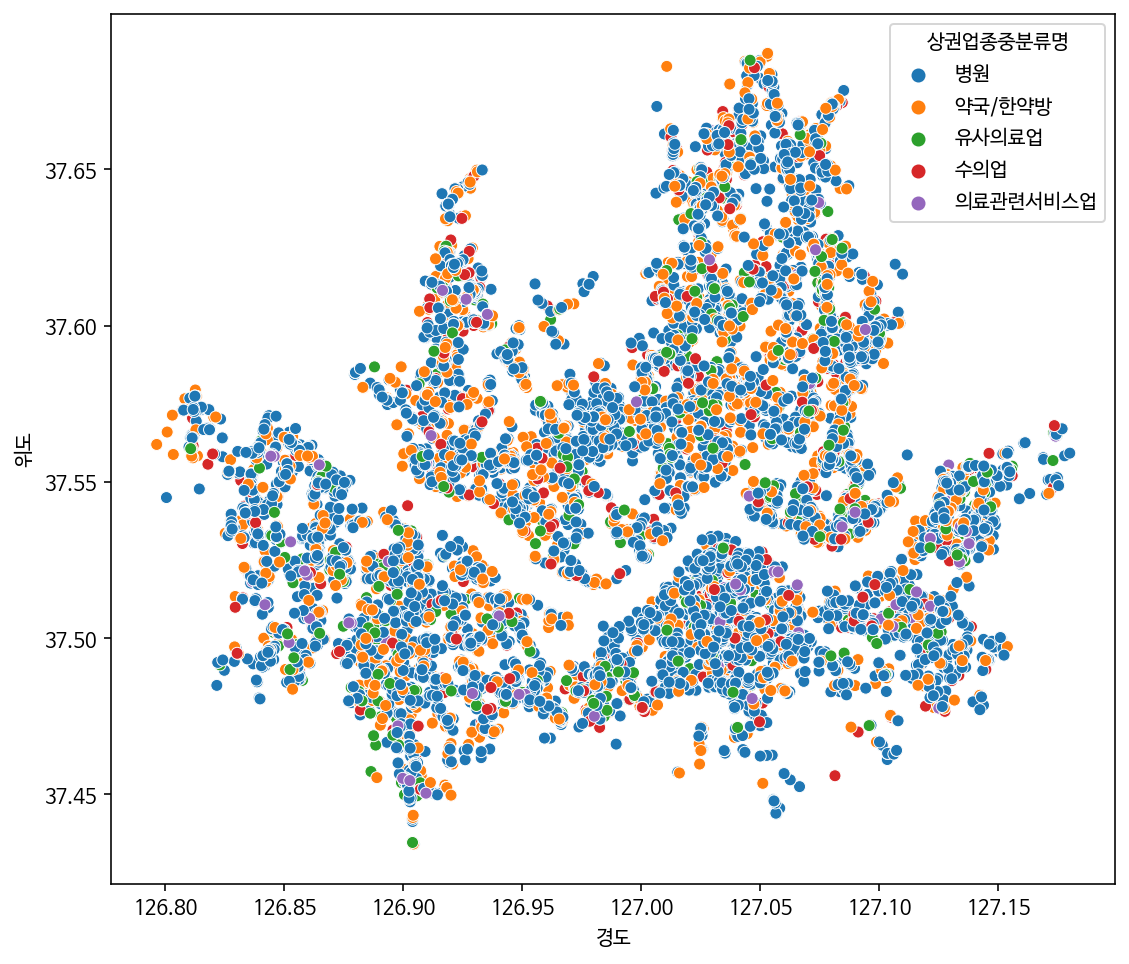

In [177]:
# seaborn의 scatterplot을 통해 "상권업종중분류명" 경도와 위도 표시
plt.figure(figsize = (9,8))
sns.scatterplot(data = df_seoul, x = "경도", y = "위도", hue = "상권업종중분류명")

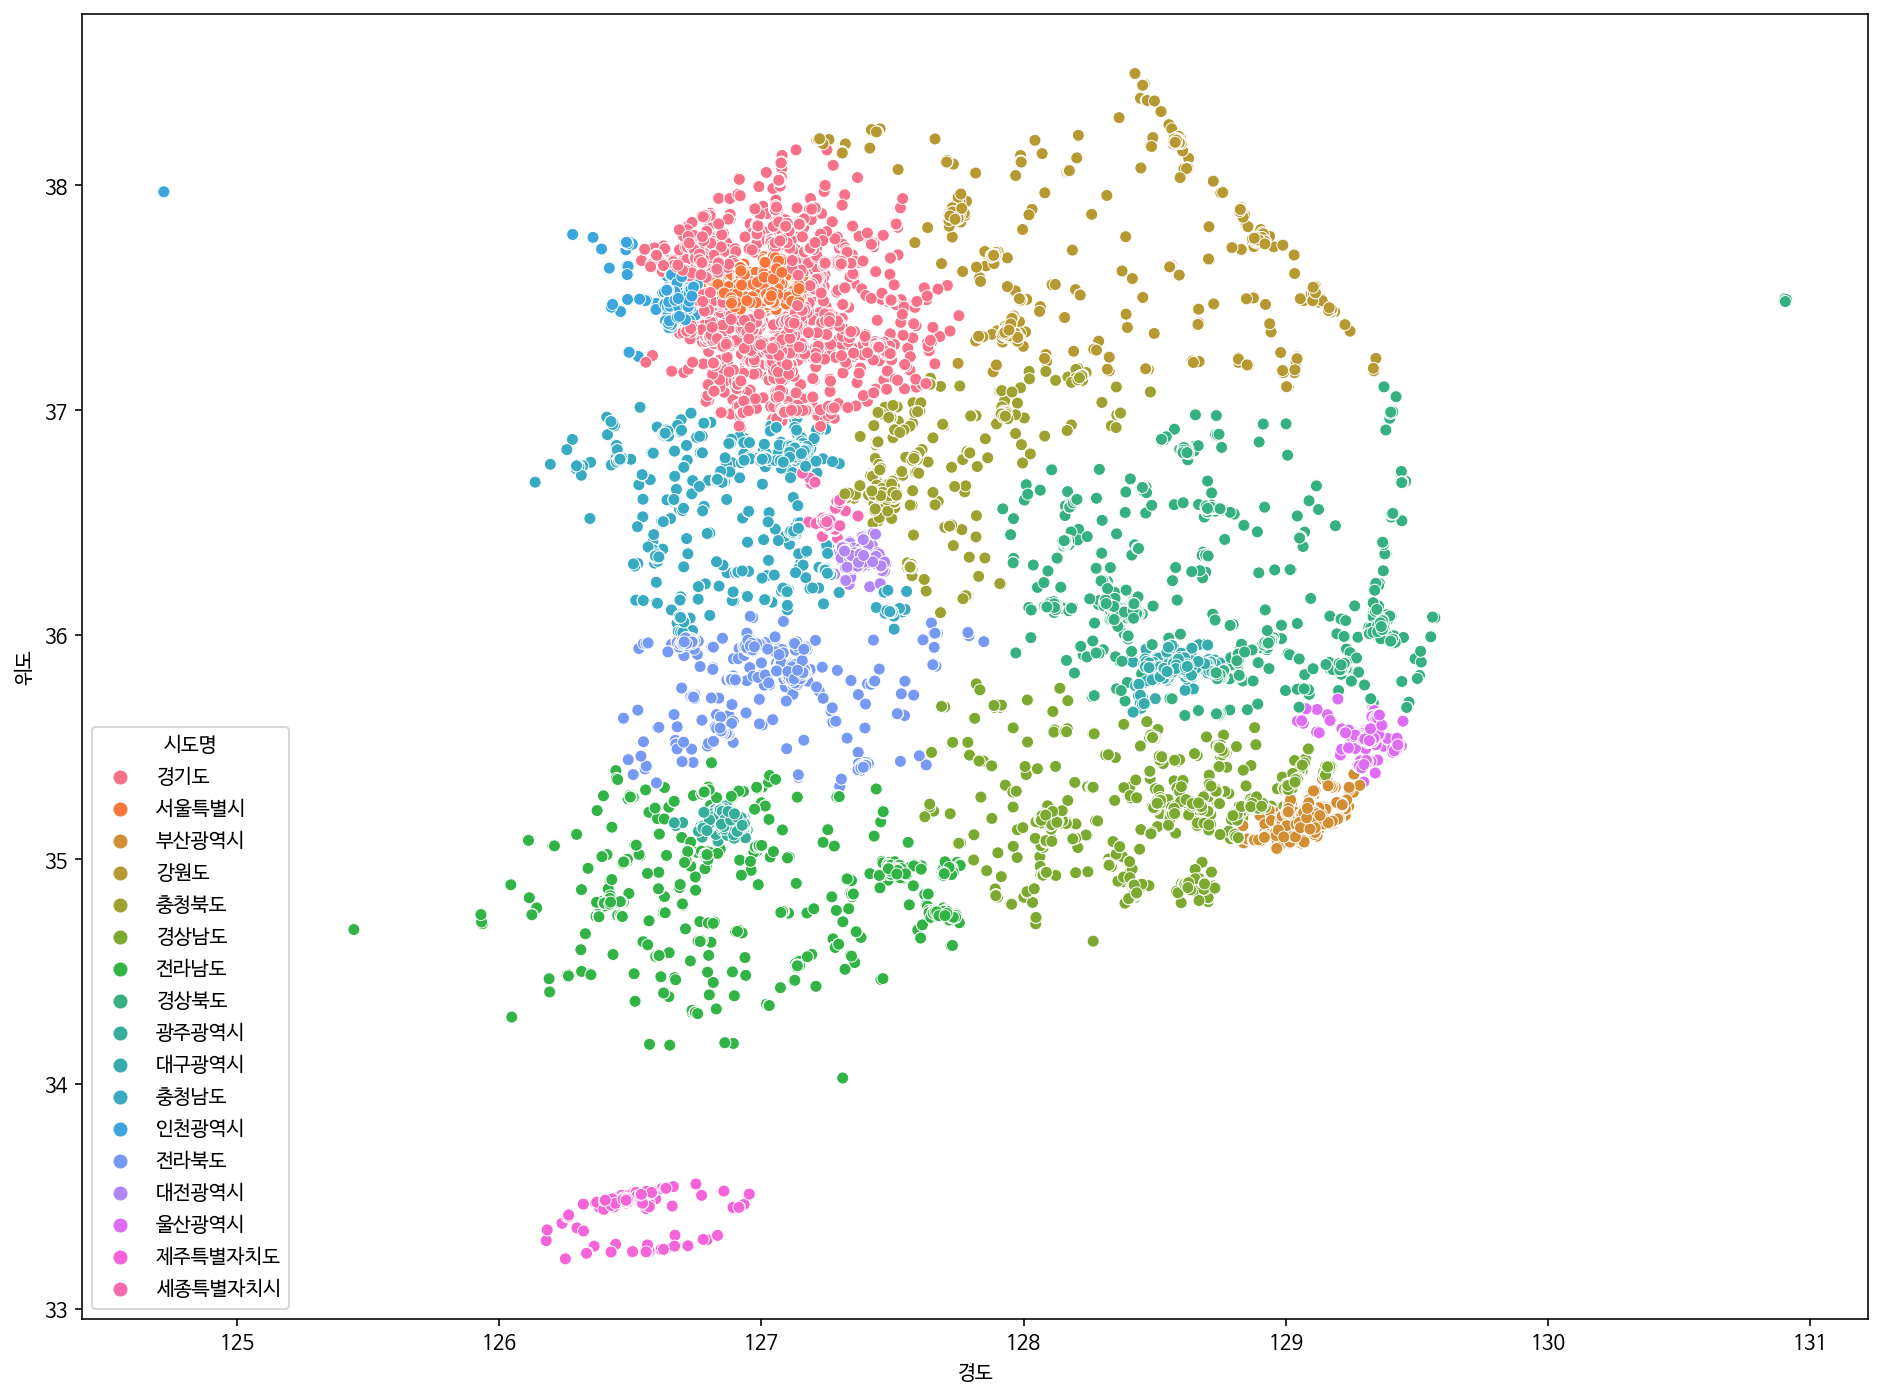

In [180]:
# seaborn의 scatterplot을 통해 전국 데이터(df)로 구별 경도와 위도 표시
plt.figure(figsize = (16,12))
sns.scatterplot(data = df, x = "경도", y = "위도", hue = "시도명")

# Folium으로 지도 활용
* 아나콘다 사용 시 프롬프트 창을 열어 conda 명령어로 설치.
  - conda install -c conda-forge folium

In [189]:
# Folium 사용
# 지도 시각화를 위한 라이브러리
import folium
# 전체적인 세계지도 출력
folium.Map()

In [185]:
# 지도의 중심 지정을 위해 위도와 경도의 평균 구하기
print(df_seoul_hospital["위도"].mean())
print(df_seoul_hospital["경도"].mean())

37.52943771376442
127.00283478732295


In [198]:
# map = folium.Map(location = [df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()],
#           zoom_start = 12)
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
        ).add_to(map)
map